## Texas 2020

I'm going to try to wrestle with some of the data provided by the Texas Ethics Commission.

So far, what I've found is that they provide multipls CSV files dating back to 2000. Unfortunately, they provide *all* of the filings dating back to 2000. When I downloaded them I received 40 files named contrib_* ... each of them with almost 500,000 rows of data.

The other problem, is that these 'contrib' files don't have a one-to-one mapping of contributions to candidates, so I have to find in the data candidate ID (or something similar) is mapped to a candidate's name or campaign.

Instructions for deciphering the data are located in the TEC-README file, which is a copy of the readme provided by the TEC.

It looks like _cover.csv_ might be the place where I can map a filer's name to the `filerIdent` field. 

Also, check _filers.csv_ 

In [1]:
import pandas as pd

import matplotlib as pl

import mpld3 as d3

In [2]:
filers = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/filers.csv', low_memory=False)

In [3]:
filers.head()

,recordType,filerIdent,filerTypeCd,filerName,unexpendContribFilerFlag,modifiedElectCycleFlag,filerJdiCd,committeeStatusCd,ctaSeekOfficeCd,ctaSeekOfficeDistrict,...,chairMailingAddr2,chairMailingCity,chairMailingStateCd,chairMailingCountyCd,chairMailingCountryCd,chairMailingPostalCode,chairMailingRegion,chairPrimaryUsaPhoneFlag,chairPrimaryPhoneNumber,chairPrimaryPhoneExt
0,FILER,10066,COH,"Lucero, Homero R. (Mr.)",N,N,NaN,NaN,STATEREP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FILER,10144,COH,"Criss, Lloyd W. (Mr.)",N,N,NaN,NaN,STATEREP,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FILER,10191,COH,"Lee, Randy M. (Mr.)",N,N,NaN,NaN,STATEREP,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FILER,10246,COH,"Herrera, Alfred R. (Mr.)",N,N,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FILER,10616,MPAC,Citizens for the Preservation of Rural Lifesty...,N,N,NaN,TERMINATED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
covers = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/cover.csv', low_memory=False)

In [5]:
covers.head()

,recordType,formTypeCd,reportInfoIdent,receivedDt,infoOnlyFlag,filerIdent,filerTypeCd,filerName,reportTypeCd1,reportTypeCd2,...,chairMailingAddr2,chairMailingCity,chairMailingStateCd,chairMailingCountyCd,chairMailingCountryCd,chairMailingPostalCode,chairMailingRegion,chairPrimaryUsaPhoneFlag,chairPrimaryPhoneNumber,chairPrimaryPhoneExt
0,CVR1,COH,132307,20000118.0,N,10066,COH,"Lucero, Homero R. (Mr.)",FINAL,FINAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CVR1,COHUC,188588,20020124.0,N,10066,COH,"Lucero, Homero R. (Mr.)",UNEXPCONT_FINAL,UNEXPCONT_FINAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CVR1,COH,187537,20020115.0,N,10191,COH,"Lee, Randy M. (Mr.)",SEMIJAN,SEMIJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CVR1,MPAC,18801,19940105.0,N,10616,MPAC,Citizens for the Preservation of Rural Lifesty...,CFJAN,CFJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CVR1,MPAC,72676,19961202.0,N,10616,MPAC,Citizens for the Preservation of Rural Lifesty...,CFDEC,CFDEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
covers_last_year = covers[covers.receivedDt >= 20181231.0]

In [7]:
covers_last_year

,recordType,formTypeCd,reportInfoIdent,receivedDt,infoOnlyFlag,filerIdent,filerTypeCd,filerName,reportTypeCd1,reportTypeCd2,...,chairMailingAddr2,chairMailingCity,chairMailingStateCd,chairMailingCountyCd,chairMailingCountryCd,chairMailingPostalCode,chairMailingRegion,chairPrimaryUsaPhoneFlag,chairPrimaryPhoneNumber,chairPrimaryPhoneExt
251661,CVR1,CORCOH,100263053,20190708.0,N,33149,JCOH,"Hawthorne, Teresa J. (The Honorable)",SEMIJUL,SEMIJUL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259151,CVR1,COH,100620927,20190131.0,N,80343,COH,"Smith, Demetria Y. (Ms.)",SEMIJAN,SEMIJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260617,CVR1,GPAC,100624808,20200114.0,N,16179,GPAC,Rio Grande Valley Associated General Contracto...,SEMIJAN,SEMIJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266032,CVR1,CORCOH,100640797,20190114.0,N,80475,SCC,"Ginyard, Cynthia M. (Ms.)",SEMIJAN,SEMIJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267042,CVR1,CORCOH,100643121,20190114.0,N,80475,SCC,"Ginyard, Cynthia M. (Ms.)",SEMIJUL,SEMIJUL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314507,CVR1,CORCOH,100771509,20200115.0,N,68271,COH,"Longoria Jr., Oscar L. (The Honorable)",SEMIJAN,SEMIJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314508,CVR1,GPAC,100771510,20200115.0,N,81871,GPAC,Latino Democrats of Denton County,A10DAYAFT,SEMIJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314509,CVR1,COHFR,100771511,20200115.0,N,69682,COH,"Carmona, Christopher (Mr.)",FINAL,SEMIJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314510,CVR1,GPAC,100771512,20200115.0,N,17327,GPAC,Teamsters Local #745 Drive,SEMIJAN,SEMIJAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
filers_last_year = pd.merge(filers, covers_last_year, on='filerIdent')

In [9]:
filers_last_year.head()

,recordType_x,filerIdent,filerTypeCd_x,filerName_x,unexpendContribFilerFlag,modifiedElectCycleFlag,filerJdiCd,committeeStatusCd,ctaSeekOfficeCd,ctaSeekOfficeDistrict,...,chairMailingAddr2_y,chairMailingCity_y,chairMailingStateCd_y,chairMailingCountyCd_y,chairMailingCountryCd_y,chairMailingPostalCode_y,chairMailingRegion_y,chairPrimaryUsaPhoneFlag_y,chairPrimaryPhoneNumber_y,chairPrimaryPhoneExt_y
0,FILER,11614,GPAC,Southwest Competitive Telecommunications Assn....,N,N,NaN,TERMINATED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FILER,11614,GPAC,Southwest Competitive Telecommunications Assn....,N,N,NaN,TERMINATED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FILER,11614,GPAC,Southwest Competitive Telecommunications Assn....,N,N,NaN,TERMINATED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FILER,11832,MPAC,Texas Chiropractic Assn. PAC,N,N,NaN,ACTIVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FILER,11832,MPAC,Texas Chiropractic Assn. PAC,N,N,NaN,ACTIVE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
filers_last_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15370 entries, 0 to 15369
Columns: 259 entries, recordType_x to chairPrimaryPhoneExt_y
dtypes: float64(54), int64(3), object(202)
memory usage: 30.5+ MB


In [11]:
export_filers = filers_last_year.to_csv('filtered/filers_last_year.csv', index=False, header=True)

In [12]:
c_35 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_35.csv', low_memory=False)

In [26]:
c_35 = c_35[c_35.receivedDt >= 20181231.0]

In [30]:
c_36 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_36.csv', low_memory=False)

In [31]:
c_37 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_37.csv', low_memory=False)

In [32]:
darby_c_37 = c_37[c_37.filerIdent == 51651]

In [36]:
c_38 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_38.csv', low_memory=False)

In [37]:
darby_c_38 = c_38[c_38.filerIdent == 51651]

In [38]:
c_39 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_39.csv', low_memory=False)

In [40]:
darby_c_39 = c_39[c_39.filerIdent == 51651]

In [41]:
c_40 = pd.read_csv('tx-ethics-filings/TEC_CF_CSV/contribs_40.csv', low_memory=False)

In [44]:
darby_c_40 = c_40[c_40.filerIdent == 51651]

In [57]:
darby_contribs = darby_c_37.append([darby_c_38, darby_c_39, darby_c_40], sort=False).sort_values(by=['contributionAmount', 'contributorNameOrganization'], ascending=True).to_csv('local-contribs/darby.csv')

In [58]:
perry_c_36 = c_36[c_36.filerIdent == 66066]

In [59]:
perry_c_37 = c_37[c_37.filerIdent == 66066]

In [60]:
perry_c_38 = c_38[c_38.filerIdent == 66066]
perry_c_39 = c_39[c_39.filerIdent == 66066]
perry_c_40 = c_40[c_40.filerIdent == 66066]

In [64]:
perry_contribs = perry_c_36.append([perry_c_37, perry_c_38, perry_c_39, perry_c_40], sort=False).sort_values(by=['contributionAmount', 'contributorNameOrganization'], ascending=True)

In [65]:
perry_csv = perry_contribs.to_csv('local-contribs/perry.csv')

In [66]:
perry_contribs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 258398 to 117409
Data columns (total 36 columns):
recordType                       630 non-null object
formTypeCd                       630 non-null object
schedFormTypeCd                  630 non-null object
reportInfoIdent                  630 non-null int64
receivedDt                       630 non-null int64
infoOnlyFlag                     630 non-null object
filerIdent                       630 non-null int64
filerTypeCd                      630 non-null object
filerName                        630 non-null object
contributionInfoId               630 non-null int64
contributionDt                   630 non-null int64
contributionAmount               630 non-null float64
contributionDescr                3 non-null object
itemizeFlag                      630 non-null object
travelFlag                       630 non-null object
contributorPersentTypeCd         630 non-null object
contributorNameOrganization      303 non-null

In [68]:
perry_totals = perry_contribs.contributionAmount.sum()

In [69]:
perry_totals

714965.85

In [78]:
individual_contribs_grouped = perry_contribs.groupby(["contributorNameFirst", "contributorNameLast"]).contributionAmount.sum().reset_index().sort_values("contributionAmount", ascending=False)

In [82]:
org_contribs_grouped = perry_contribs.groupby("contributorNameOrganization").contributionAmount.sum().reset_index().sort_values("contributionAmount", ascending=False)

In [83]:
individual_contribs_grouped.to_csv('local-contribs/perry-grouped-individual.csv')

In [84]:
org_contribs_grouped.to_csv('local-contribs/perry-grouped-orgs.csv')

In [85]:
%matplotlib inline

Text(0.5, 1.0, 'Charles Perry: Highest Contributing Organizations')

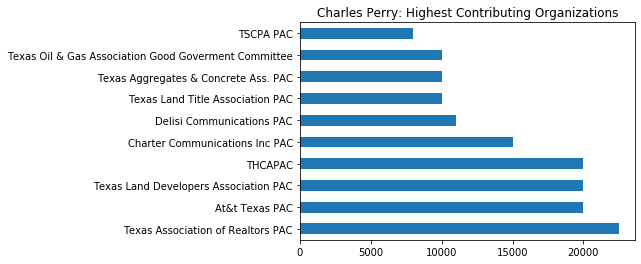

In [89]:
org_chart = org_contribs_grouped.head(10).contributionAmount.plot.barh()
org_chart.set_yticklabels(org_contribs_grouped.contributorNameOrganization)
org_chart.set_title('Charles Perry: Highest Contributing Organizations')

Text(0.5, 1.0, 'Charles Perry: Highest Contributing Individuals')

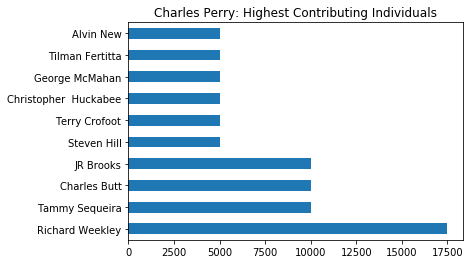

In [90]:
individual_chart = individual_contribs_grouped.head(10).contributionAmount.plot.barh()
individual_chart.set_yticklabels(individual_contribs_grouped.contributorNameFirst + ' ' + individual_contribs_grouped.contributorNameLast)
individual_chart.set_title('Charles Perry: Highest Contributing Individuals')